In [5]:
from google.colab import drive
from pandas       import read_csv

drive.mount('/content/drive')

data = read_csv(
    '/content/drive/MyDrive/Machine Learning/Google-Playstore_preprocessed.csv',
    encoding='utf-8',
    encoding_errors='replace'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from sklearn                 import tree
from sklearn.model_selection import train_test_split
from matplotlib.pyplot       import plot,axvline,title,xlabel,ylabel,legend,show

min_installs = 'Minimum Installs'

train_data, test_data, train_targets, test_targets = train_test_split(
    data.drop(min_installs, axis=1),
    data[min_installs],
    test_size=0.2,
    stratify=data[min_installs]
)

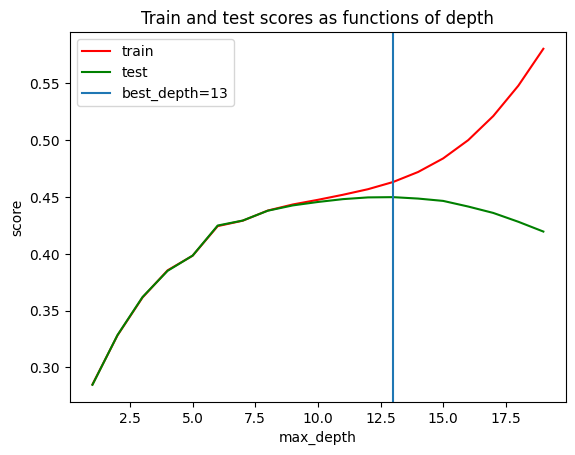

In [7]:
depths         = range(1,20,1)
train          = []
test           = []
test_score_max = 0

for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf = clf.fit(train_data, train_targets)
    train.append(clf.score(train_data, train_targets))
    test_score = clf.score(test_data, test_targets)
    test.append(test_score)
    if test_score > test_score_max:
        test_score_max = test_score
        best_depth = depth

plot(depths, train, 'r', label='train')
plot(depths, test,  'g', label='test')
title('Train and test scores as functions of depth')
axvline(x=best_depth, label='best_depth='+str(best_depth))
xlabel('max_depth')
ylabel('score')
legend()
show()